In [26]:
# from datasets import load_dataset

# dataset = load_dataset("LightTai/personalized-email")

In [27]:
# print(dataset)
# train_ds = dataset['train']
# train_ds

In [28]:
from datasets import load_dataset

dataset = load_dataset("Isotonic/marketing_email_samples")

In [29]:
print(dataset)
train_ds = dataset['train']
test_ds = dataset['test']



DatasetDict({
    train: Dataset({
        features: ['product', 'description', 'marketing_email'],
        num_rows: 487
    })
    test: Dataset({
        features: ['product', 'description', 'marketing_email'],
        num_rows: 87
    })
})


In [30]:
print(train_ds)
print(test_ds)

Dataset({
    features: ['product', 'description', 'marketing_email'],
    num_rows: 487
})
Dataset({
    features: ['product', 'description', 'marketing_email'],
    num_rows: 87
})


In [31]:
train_ds[0]

{'product': 'FitnessFan ',
 'description': 'A portable fan with built:in fitness tracker',
 'marketing_email': "Subject line: Stay cool while you work out with FitnessFan!\n\nDear Fitness Enthusiast,\n\nAre you tired of working out in the heat, feeling like you're going to melt? We have the solution for you! Introducing FitnessFan, the portable fan with a built-in fitness tracker.\n\nYou'll never have to worry about overheating again, as the powerful fan will keep you cool during even the most intense workouts. And with the fitness tracker, you can easily monitor your progress and achieve your goals.\n\nTake FitnessFan with you wherever you go - to the gym, on a run, or even in your own backyard. It's lightweight and easy to carry, making it the perfect companion for any fitness enthusiast.\n\nDon't let the heat stop you from achieving your fitness goals. Order your FitnessFan today and stay cool while you work out!\n\nBest regards,\n\n[Your Name]"}

In [32]:
product_name = train_ds['product']
total_product_count = len(set(product_name))
print('Total product names in train dataset: ', total_product_count)

Total product names in train dataset:  480


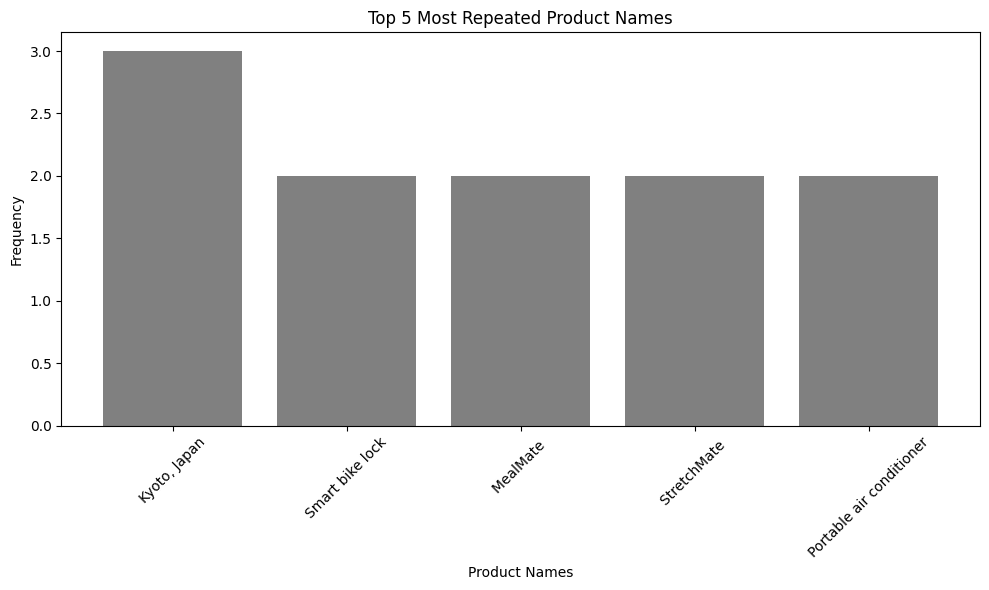

In [39]:
import matplotlib.pyplot as plt

# Count the occurrences of each product name
product_counts = {product: product_name.count(product) for product in set(product_name)}

# Sort the product names by their counts and select the top 5 most frequent ones
sorted_product_counts = dict(sorted(product_counts.items(), key=lambda item: item[1], reverse=True)[:5])

# Plot the distribution of the top 10 most repeated product names
plt.figure(figsize=(10, 6))
plt.bar(sorted_product_counts.keys(), sorted_product_counts.values(), color='grey')
plt.xlabel('Product Names')
plt.ylabel('Frequency')
plt.title('Top 5 Most Repeated Product Names')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each product name
product_counts = {product: product_name.count(product) for product in set(product_name)}

# Sort the product names by their counts and select the top 5 most frequent ones
sorted_product_counts = dict(sorted(product_counts.items(), key=lambda item: item[1], reverse=True)[:5])

# Plot the distribution of the top 10 most repeated product names
plt.figure(figsize=(10, 6))
plt.bar(sorted_product_counts.keys(), sorted_product_counts.values(), color='grey')
plt.xlabel('Product Names')
plt.ylabel('Frequency')
plt.title('Top 5 Most Repeated Product Names')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

product_counts = {product: product_name}

In [34]:
#concatenate 'product' and  'description' columns to form input text
train_input_text = [f"{product}: {description}" for product, description in zip(train_ds['product'], train_ds['description'])]
test_input_text = {f"{product}: {description}" for product, description in zip(test_ds['product'], test_ds['description'])}


#target output for marketing emails
train_target_output = train_ds['marketing_email']
test_target_output = test_ds['marketing_email']


In [40]:
train_target_output[:5]

test_target_output[:5]

["Subject: Discover the Vibrant Coastal Town of Cartagena, Colombia!\n\nDear [Recipient],\n\nAre you looking for a unique and vibrant travel experience? Encounter the colorful streets of Cartagena, Colombia, a stunning coastal town filled with Spanish colonial architecture and rich culture. \n\nAs you wander through the town, enjoy the lively sounds of the bustling streets and indulge in the mouth-watering local cuisine. Explore the rich history and stunning beauty of this hidden gem, from the ancient walls of the Old City to the pristine beaches just a short walk away.\n\nGet ready to experience the warm hospitality of the locals and the infectious energy of this charming town. Whether you're looking for adventure, relaxation, or a bit of both, Cartagena has something for everyone!\n\nBook your trip to Cartagena today and discover the ultimate paradise! \n\nSincerely, \n[Your Name]",
 "Subject: Save money on car insurance with CarSave!\n\nHello there,\n\nAre you tired of overpaying fo